<a href="https://colab.research.google.com/github/kaidob/Hello-World/blob/master/Kopie_von_GANChart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saved: Doberstein_HRDAL_Gantt_Chart.pdf


Saved: Doberstein_HRDAL_Gantt_Chart.svg


Saved: Doberstein_HRDAL_Gantt_Chart.png


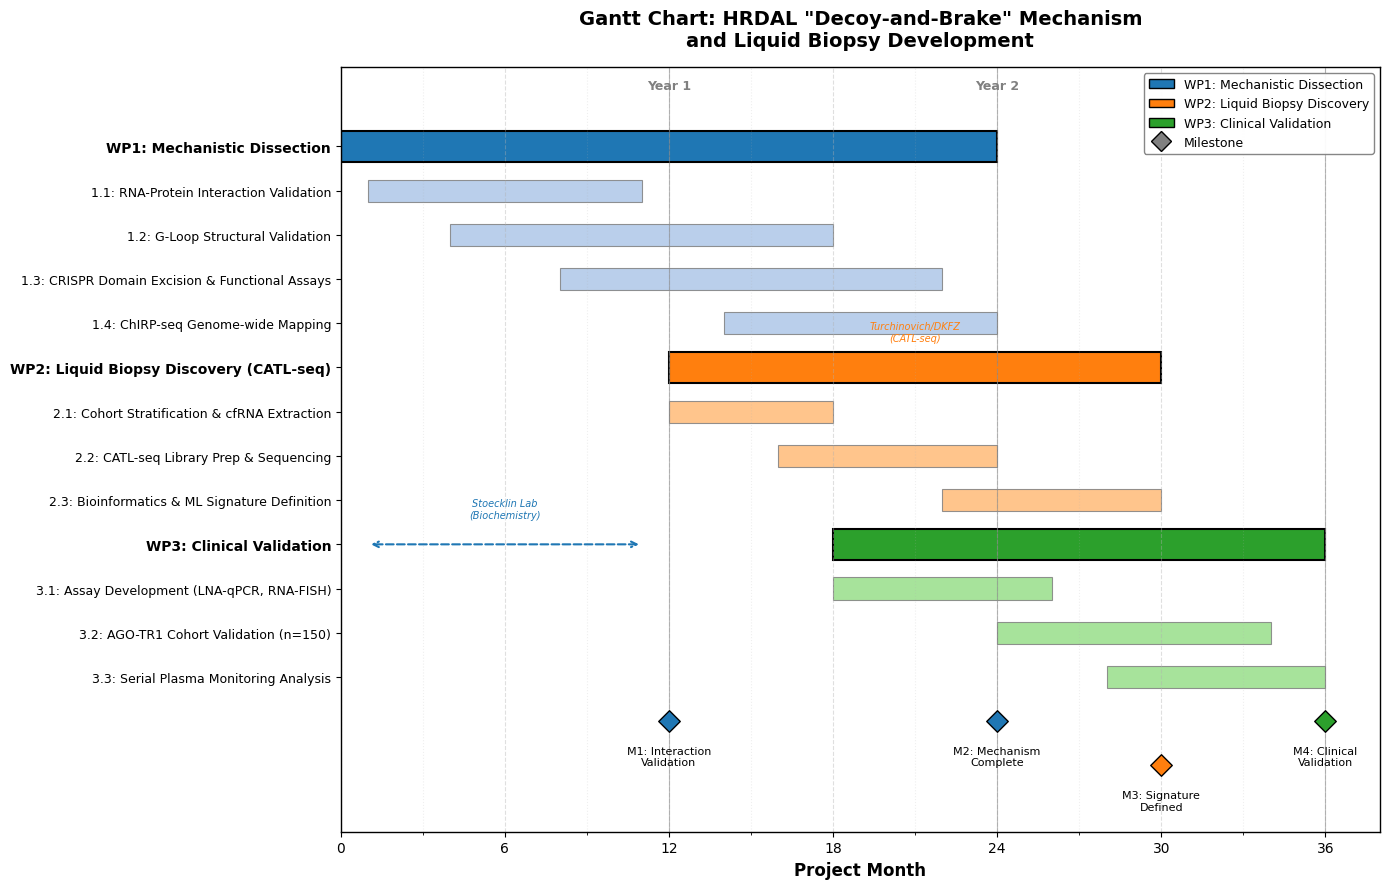


PROJECT TIMELINE SUMMARY
Work Package                                   Start    End
------------------------------------------------------------

WP1: Mechanistic Dissection                        0     24
  1.1: RNA-Protein Interaction Validation          1     11
  1.2: G-Loop Structural Validation                4     18
  1.3: CRISPR Domain Excision & Functional Assays      8     22
  1.4: ChIRP-seq Genome-wide Mapping              14     24

WP2: Liquid Biopsy Discovery (CATL-seq)           12     30
  2.1: Cohort Stratification & cfRNA Extraction     12     18
  2.2: CATL-seq Library Prep & Sequencing         16     24
  2.3: Bioinformatics & ML Signature Definition     22     30

WP3: Clinical Validation                          18     36
  3.1: Assay Development (LNA-qPCR, RNA-FISH)     18     26
  3.2: AGO-TR1 Cohort Validation (n=150)          24     34
  3.3: Serial Plasma Monitoring Analysis          28     36

MILESTONES
Month 12: M1: Interaction Validation
Month 24: M2:

In [1]:
# -*- coding: utf-8 -*-
"""
DFG Grant Proposal - Gantt Chart Generator
Project: G-Loop-Mediated Regulation of Replication Fork Stability by HRDAL
Applicant: Kai Doberstein
"""

import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

# --- Project Data based on Updated Proposal ---
# Project Duration: 36 Months
# WP1: Months 1-24, WP2: Months 12-30, WP3: Months 18-36

tasks = [
    # Work Package 1: Deciphering the "Decoy-and-Brake" Mechanism
    {"Task": "WP1: Mechanistic Dissection", "Start": 0, "Duration": 24, "Color": "#1f77b4", "Type": "WP"},
    {"Task": "1.1: RNA-Protein Interaction Validation", "Start": 1, "Duration": 10, "Color": "#aec7e8", "Type": "Task"},
    {"Task": "1.2: G-Loop Structural Validation", "Start": 4, "Duration": 14, "Color": "#aec7e8", "Type": "Task"},
    {"Task": "1.3: CRISPR Domain Excision & Functional Assays", "Start": 8, "Duration": 14, "Color": "#aec7e8", "Type": "Task"},
    {"Task": "1.4: ChIRP-seq Genome-wide Mapping", "Start": 14, "Duration": 10, "Color": "#aec7e8", "Type": "Task"},

    # Work Package 2: Unbiased Discovery of Circulating HRD Signature
    {"Task": "WP2: Liquid Biopsy Discovery (CATL-seq)", "Start": 12, "Duration": 18, "Color": "#ff7f0e", "Type": "WP"},
    {"Task": "2.1: Cohort Stratification & cfRNA Extraction", "Start": 12, "Duration": 6, "Color": "#ffbb78", "Type": "Task"},
    {"Task": "2.2: CATL-seq Library Prep & Sequencing", "Start": 16, "Duration": 8, "Color": "#ffbb78", "Type": "Task"},
    {"Task": "2.3: Bioinformatics & ML Signature Definition", "Start": 22, "Duration": 8, "Color": "#ffbb78", "Type": "Task"},

    # Work Package 3: Clinical Validation & Dynamic Monitoring
    {"Task": "WP3: Clinical Validation", "Start": 18, "Duration": 18, "Color": "#2ca02c", "Type": "WP"},
    {"Task": "3.1: Assay Development (LNA-qPCR, RNA-FISH)", "Start": 18, "Duration": 8, "Color": "#98df8a", "Type": "Task"},
    {"Task": "3.2: AGO-TR1 Cohort Validation (n=150)", "Start": 24, "Duration": 10, "Color": "#98df8a", "Type": "Task"},
    {"Task": "3.3: Serial Plasma Monitoring Analysis", "Start": 28, "Duration": 8, "Color": "#98df8a", "Type": "Task"},
]

# Create DataFrame
df = pd.DataFrame(tasks)

# Flip order so WP1 is at top of chart
df = df.iloc[::-1].reset_index(drop=True)

# --- Plotting with Publication-Quality Settings ---
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.linewidth'] = 1.0

fig, ax = plt.subplots(figsize=(14, 9))

# Create horizontal bars
for i, row in df.iterrows():
    task = row['Task']
    start = row['Start']
    duration = row['Duration']
    color = row['Color']
    is_wp = row['Type'] == "WP"

    # Thicker bars for WP headers, thinner for sub-tasks
    height = 0.7 if is_wp else 0.5
    alpha = 1.0 if is_wp else 0.85
    linewidth = 1.5 if is_wp else 0.8

    # Bold font for WP headers
    if is_wp:
        ax.barh(i, duration, left=start, height=height, color=color,
                alpha=alpha, edgecolor='black', linewidth=linewidth)
    else:
        ax.barh(i, duration, left=start, height=height, color=color,
                alpha=alpha, edgecolor='gray', linewidth=linewidth)

# Set y-axis labels
ax.set_yticks(range(len(df)))
ax.set_yticklabels(df['Task'], fontsize=9)

# Make WP labels bold
labels = ax.get_yticklabels()
for i, label in enumerate(labels):
    if df.iloc[i]['Type'] == 'WP':
        label.set_fontweight('bold')
        label.set_fontsize(10)

# X-axis formatting
ax.set_xlabel('Project Month', fontsize=12, fontweight='bold')
ax.set_xlim(0, 38)
ax.set_xticks(range(0, 37, 6))
ax.set_xticklabels(['0', '6', '12', '18', '24', '30', '36'])

# Add minor ticks every 3 months
ax.set_xticks(range(0, 37, 3), minor=True)

# Title
ax.set_title('Gantt Chart: HRDAL "Decoy-and-Brake" Mechanism\nand Liquid Biopsy Development',
             fontsize=14, fontweight='bold', pad=15)

# Grid
ax.grid(axis='x', linestyle='--', alpha=0.4, which='major')
ax.grid(axis='x', linestyle=':', alpha=0.2, which='minor')

# Add vertical lines for year markers
for year_month in [12, 24, 36]:
    ax.axvline(x=year_month, color='gray', linestyle='-', linewidth=0.8, alpha=0.5)
    ax.text(year_month, len(df) + 0.3, f'Year {year_month//12}',
            ha='center', fontsize=9, color='gray', fontweight='bold')

# --- Add Milestones (Diamond markers) ---
milestones = [
    {"Month": 12, "Label": "M1: Interaction\nValidation", "Color": "#1f77b4", "y_pos": -1.0},
    {"Month": 24, "Label": "M2: Mechanism\nComplete", "Color": "#1f77b4", "y_pos": -1.0},
    {"Month": 30, "Label": "M3: Signature\nDefined", "Color": "#ff7f0e", "y_pos": -2.0},
    {"Month": 36, "Label": "M4: Clinical\nValidation", "Color": "#2ca02c", "y_pos": -1.0},
]

for m in milestones:
    ax.scatter(m['Month'], m['y_pos'], marker='D', s=120, color=m['Color'],
               zorder=5, edgecolor='black', linewidth=1)
    ax.text(m['Month'], m['y_pos'] - 1.0, m['Label'], ha='center',
            fontsize=8, color='black', multialignment='center')

# Extend y-axis to show milestones
ax.set_ylim(-3.5, len(df) + 0.8)

# --- Legend ---
legend_elements = [
    mpatches.Patch(facecolor='#1f77b4', edgecolor='black', label='WP1: Mechanistic Dissection'),
    mpatches.Patch(facecolor='#ff7f0e', edgecolor='black', label='WP2: Liquid Biopsy Discovery'),
    mpatches.Patch(facecolor='#2ca02c', edgecolor='black', label='WP3: Clinical Validation'),
    Line2D([0], [0], marker='D', color='w', markerfacecolor='gray',
           markersize=10, markeredgecolor='black', label='Milestone')
]

ax.legend(handles=legend_elements, loc='upper right', fontsize=9,
          framealpha=0.95, edgecolor='gray')

# --- Add collaboration annotations ---
# Stoecklin collaboration (WP1)
ax.annotate('', xy=(1, 3), xytext=(11, 3),
            arrowprops=dict(arrowstyle='<->', color='#1f77b4', lw=1.5, ls='--'))
ax.text(6, 3.6, 'Stoecklin Lab\n(Biochemistry)', ha='center', fontsize=7,
        color='#1f77b4', style='italic')

# Turchinovich collaboration (WP2)
ax.annotate('', xy=(12, 7), xytext=(30, 7),
            arrowprops=dict(arrowstyle='<->', color='#ff7f0e', lw=1.5, ls='--'))
ax.text(21, 7.6, 'Turchinovich/DKFZ\n(CATL-seq)', ha='center', fontsize=7,
        color='#ff7f0e', style='italic')

# Adjust layout
plt.tight_layout()

# --- Save as Vector Graphics ---
# Save as PDF (vector)
plt.savefig('Doberstein_HRDAL_Gantt_Chart.pdf', format='pdf', dpi=300,
            bbox_inches='tight', facecolor='white', edgecolor='none')
print("Saved: Doberstein_HRDAL_Gantt_Chart.pdf")

# Save as SVG (vector)
plt.savefig('Doberstein_HRDAL_Gantt_Chart.svg', format='svg',
            bbox_inches='tight', facecolor='white', edgecolor='none')
print("Saved: Doberstein_HRDAL_Gantt_Chart.svg")

# Save as high-resolution PNG (for preview)
plt.savefig('Doberstein_HRDAL_Gantt_Chart.png', format='png', dpi=300,
            bbox_inches='tight', facecolor='white', edgecolor='none')
print("Saved: Doberstein_HRDAL_Gantt_Chart.png")

plt.show()

# --- Print Timeline Summary ---
print("\n" + "="*60)
print("PROJECT TIMELINE SUMMARY")
print("="*60)
print(f"{'Work Package':<45} {'Start':>6} {'End':>6}")
print("-"*60)
for _, row in df.iloc[::-1].iterrows():
    if row['Type'] == 'WP':
        print(f"\n{row['Task']:<45} {row['Start']:>6} {row['Start']+row['Duration']:>6}")
    else:
        print(f"  {row['Task']:<43} {row['Start']:>6} {row['Start']+row['Duration']:>6}")
print("\n" + "="*60)
print("MILESTONES")
print("="*60)
for m in milestones:
    print(f"Month {m['Month']:>2}: {m['Label'].replace(chr(10), ' ')}")

/tmp/ipython-input-1849135990.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(df['Task'], fontsize=9)


Vector graphics (SVG and PDF) generated successfully.


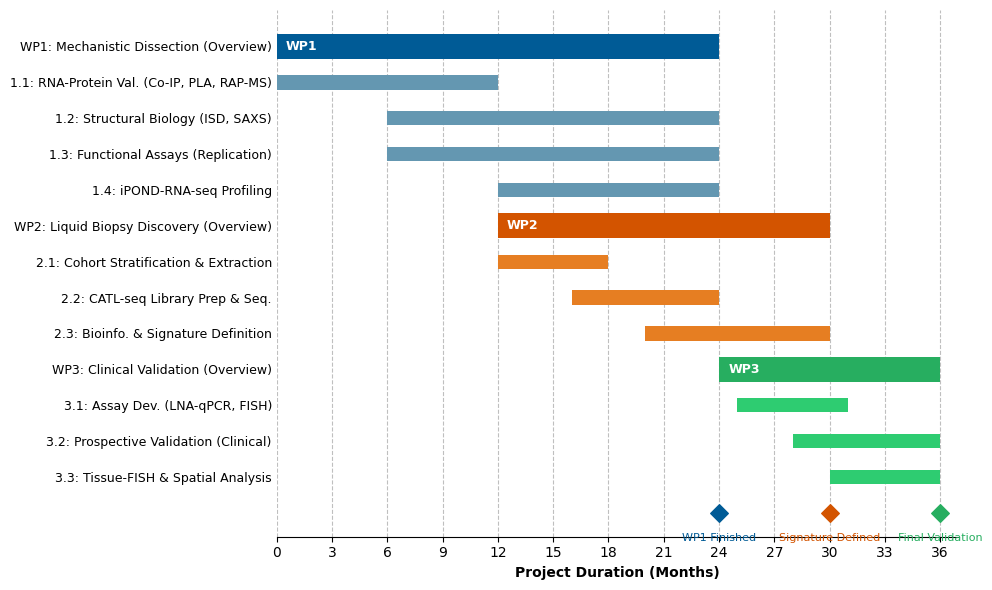

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

# --- 1. Define the Project Schedule ---
tasks = [
    # Work Package 1: Blue
    {"Task": "WP1: Mechanistic Dissection (Overview)", "Start": 0, "Duration": 24, "Color": "#005b96", "Type": "WP"},
    {"Task": "1.1: RNA-Protein Val. (Co-IP, PLA, RAP-MS)", "Start": 0, "Duration": 12, "Color": "#6497b1", "Type": "Task"},
    {"Task": "1.2: Structural Biology (ISD, SAXS)", "Start": 6, "Duration": 18, "Color": "#6497b1", "Type": "Task"},
    {"Task": "1.3: Functional Assays (Replication)", "Start": 6, "Duration": 18, "Color": "#6497b1", "Type": "Task"},
    {"Task": "1.4: iPOND-RNA-seq Profiling", "Start": 12, "Duration": 12, "Color": "#6497b1", "Type": "Task"},

    # Work Package 2: Orange
    {"Task": "WP2: Liquid Biopsy Discovery (Overview)", "Start": 12, "Duration": 18, "Color": "#d35400", "Type": "WP"},
    {"Task": "2.1: Cohort Stratification & Extraction", "Start": 12, "Duration": 6, "Color": "#e67e22", "Type": "Task"},
    {"Task": "2.2: CATL-seq Library Prep & Seq.", "Start": 16, "Duration": 8, "Color": "#e67e22", "Type": "Task"},
    {"Task": "2.3: Bioinfo. & Signature Definition", "Start": 20, "Duration": 10, "Color": "#e67e22", "Type": "Task"},

    # Work Package 3: Green
    {"Task": "WP3: Clinical Validation (Overview)", "Start": 24, "Duration": 12, "Color": "#27ae60", "Type": "WP"},
    {"Task": "3.1: Assay Dev. (LNA-qPCR, FISH)", "Start": 25, "Duration": 6, "Color": "#2ecc71", "Type": "Task"},
    {"Task": "3.2: Prospective Validation (Clinical)", "Start": 28, "Duration": 8, "Color": "#2ecc71", "Type": "Task"},
    {"Task": "3.3: Tissue-FISH & Spatial Analysis", "Start": 30, "Duration": 6, "Color": "#2ecc71", "Type": "Task"},
]

# Convert to DataFrame and invert order (so WP1 is at the top)
df = pd.DataFrame(tasks).iloc[::-1]

# --- 2. Create the Plot ---
fig, ax = plt.subplots(figsize=(10, 6))

# Draw bars
for i, task in enumerate(df['Task']):
    start = df.iloc[i]['Start']
    duration = df.iloc[i]['Duration']
    color = df.iloc[i]['Color']
    is_wp = df.iloc[i]['Type'] == "WP"

    # Style: Main WPs are thicker and darker; Sub-tasks are thinner and lighter
    height = 0.7 if is_wp else 0.4

    # Add the bar
    ax.barh(task, duration, left=start, height=height, color=color, edgecolor='none')

    # Add text label inside the bar if it fits, or to the right
    if is_wp:
        ax.text(start + 0.5, i, task.split(":")[0], va='center', ha='left', color='white', fontweight='bold', fontsize=9)

# --- 3. Formatting for "Scientific/DFG" Look ---
ax.set_xlim(0, 37)
ax.set_xticks(range(0, 37, 3))  # Ticks every 3 months
ax.set_xlabel('Project Duration (Months)', fontsize=10, fontweight='bold')
ax.xaxis.grid(True, linestyle='--', alpha=0.5, color='gray')
ax.set_axisbelow(True) # Put grid behind bars

# Remove top and right spines (cleaner look)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Y-axis labels styling
ax.set_yticklabels(df['Task'], fontsize=9)
ax.tick_params(axis='y', length=0) # Hide Y ticks

# --- 4. Add Milestones (Diamonds) ---
# (Month, Label, Color)
milestones = [
    (24, "WP1 Finished", "#005b96"),
    (30, "Signature Defined", "#d35400"),
    (36, "Final Validation", "#27ae60")
]

for m_time, m_label, m_color in milestones:
    # Plot diamond at the bottom of the chart
    y_pos = -1
    ax.scatter(m_time, y_pos, marker='D', s=80, color=m_color, clip_on=False)
    ax.text(m_time, y_pos - 0.8, m_label, ha='center', fontsize=8, color=m_color, clip_on=False)

plt.tight_layout()

# --- 5. Save as Vector Graphics ---
# SVG is best for Word (modern versions) and Web
plt.savefig('Doberstein_Gantt.svg', format='svg', bbox_inches='tight')

# PDF is best for LaTeX or if Word struggles with SVG
plt.savefig('Doberstein_Gantt.pdf', format='pdf', bbox_inches='tight')

print("Vector graphics (SVG and PDF) generated successfully.")
plt.show()